# SGD with Momentum

[link](https://ut.philkr.net/deeplearning/deep_networks/variance_reduction_in_sgd/)

In [98]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from model.architectures import MLP

## Momentum

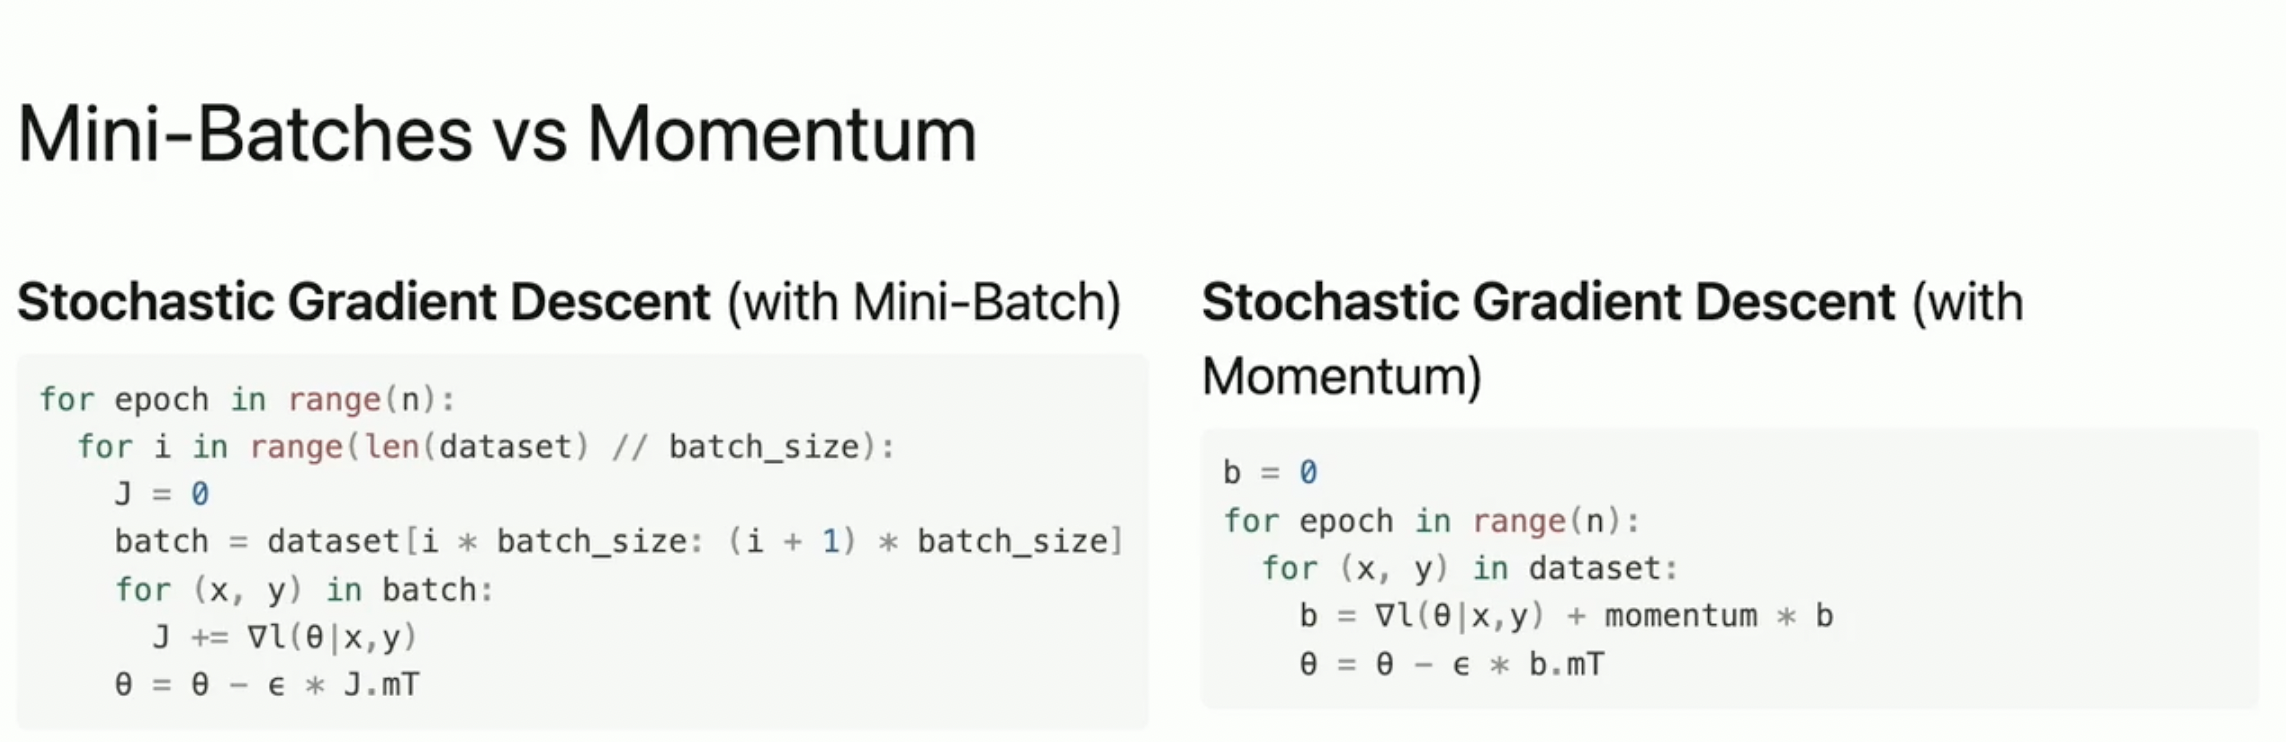

## Create Dataset

In [99]:
f = lambda x: 1+2*x**2

N = 32
xs = (4*torch.rand(N)-2)[:,None]
ys = f(xs) + 0.5*torch.randn(N,1)
x_eval = torch.linspace(-2,2,100)

dataset = TensorDataset(xs, ys)

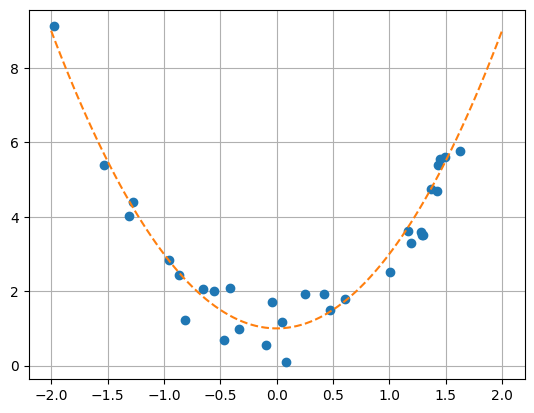

In [100]:
plt.plot(xs[:,0].detach().numpy(), ys[:,0].detach().numpy(), 'o')
plt.plot(x_eval.detach().numpy(), f(x_eval).detach().numpy(), '--')
plt.grid()
plt.show()

## Train with SGD with Momentum

In [101]:
lr = 0.01
momentum = 0.9
batch_size = 8
loss_fn = nn.MSELoss()  
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

### Torch

In [102]:
torch.manual_seed(1)

model = MLP(input_dim=1, hidden_dim=[64,64], output_dim=1)
opt = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

model.train()
losses = []
for epoch in range(100):
    for x, y in data_loader:
        preds = model(x)
        loss  = loss_fn(preds, y)
        loss.backward()
        opt.step()
        opt.zero_grad()  

        losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 3.9871459007263184
Epoch 10, Loss: 0.4681457579135895
Epoch 20, Loss: 0.4193882942199707
Epoch 30, Loss: 0.3979964256286621
Epoch 40, Loss: 0.36423638463020325
Epoch 50, Loss: 0.33696508407592773
Epoch 60, Loss: 0.16530552506446838
Epoch 70, Loss: 0.24200886487960815
Epoch 80, Loss: 0.3574058413505554
Epoch 90, Loss: 0.27518531680107117


### hand-rolled

In [103]:
torch.manual_seed(1)


model = MLP(input_dim=1, hidden_dim=[64,64], output_dim=1)
model.train()
losses = []

# Initialize momentum buffer
b = []
with torch.no_grad():
    for param in model.parameters():
        b.append(0)
        
for epoch in range(100):
    for x, y in data_loader:
        preds = model(x)
        loss  = loss_fn(preds, y)
        loss.backward()
        # Manual SGD with momentum update
        with torch.no_grad():
            for i,param in enumerate(model.parameters()):
                b[i] = momentum * b[i] + param.grad
                param.add_(b[i], alpha=-lr) 
                param.grad.zero_()
        losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 3.9871459007263184
Epoch 10, Loss: 0.4681457579135895
Epoch 20, Loss: 0.4193882942199707
Epoch 30, Loss: 0.3979964256286621
Epoch 40, Loss: 0.36423638463020325
Epoch 50, Loss: 0.33696508407592773
Epoch 60, Loss: 0.16530552506446838
Epoch 70, Loss: 0.24200886487960815
Epoch 80, Loss: 0.3574058413505554
Epoch 90, Loss: 0.27518531680107117


## Evaluate

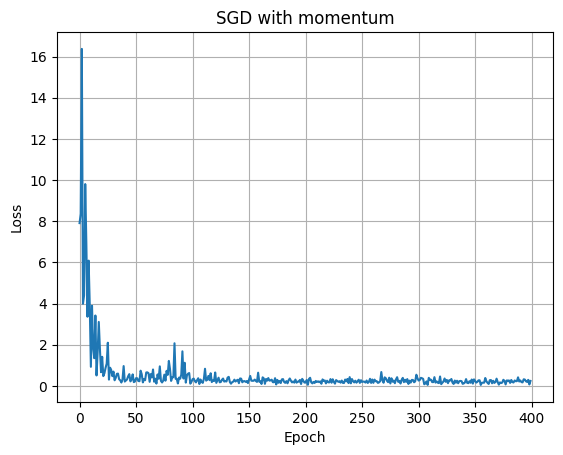

In [104]:
plt.plot(losses)
plt.title("SGD with momentum")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Evaluation

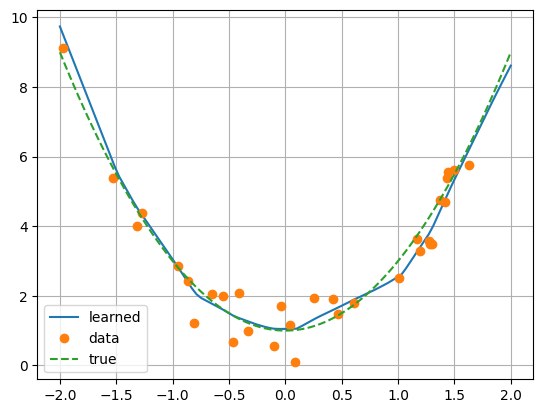

In [105]:
plt.plot(x_eval,model(x_eval[:,None]).squeeze().detach().numpy(), '-',label='learned')
plt.plot(xs[:,0].detach().numpy(), ys[:,0].detach().numpy(), 'o',label='data')
plt.plot(x_eval,f(x_eval), '--',label='true')
plt.legend()
plt.grid()
plt.show()

## Train with SGD without Momentum

In [106]:
torch.manual_seed(1)

model = MLP(input_dim=1, hidden_dim=[64,64], output_dim=1)
opt = torch.optim.SGD(model.parameters(), lr=lr, momentum=0)

model.train()
losses = []
for epoch in range(100):
    for x, y in data_loader:
        preds = model(x)
        loss  = loss_fn(preds, y)
        loss.backward()
        opt.step()
        opt.zero_grad()  

        losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 7.307751178741455
Epoch 10, Loss: 1.9141470193862915
Epoch 20, Loss: 0.40941619873046875
Epoch 30, Loss: 0.31822606921195984
Epoch 40, Loss: 0.35117629170417786
Epoch 50, Loss: 0.4720958471298218
Epoch 60, Loss: 0.5699760913848877
Epoch 70, Loss: 0.4024271070957184
Epoch 80, Loss: 0.46068820357322693
Epoch 90, Loss: 0.5514734387397766


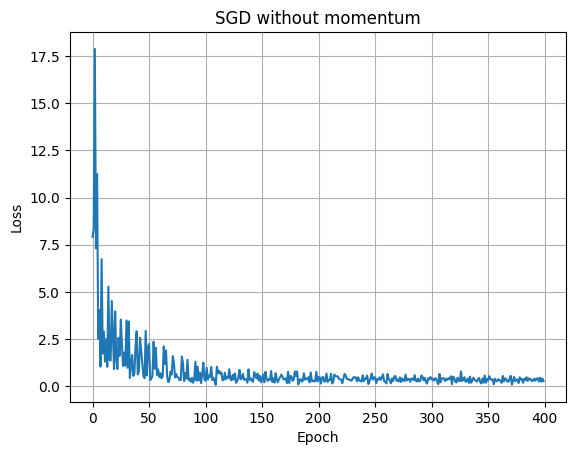

In [108]:
plt.plot(losses)
plt.title("SGD without momentum")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Evaluation

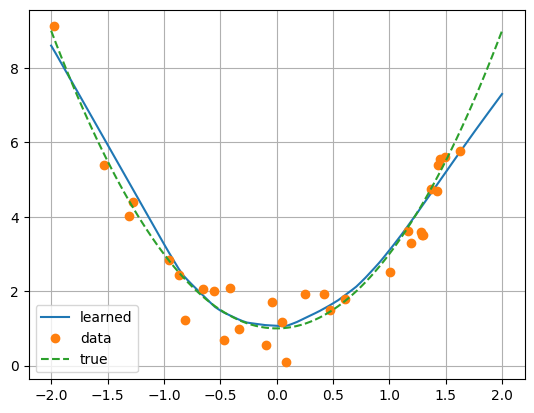

In [109]:
plt.plot(x_eval,model(x_eval[:,None]).squeeze().detach().numpy(), '-',label='learned')
plt.plot(xs[:,0].detach().numpy(), ys[:,0].detach().numpy(), 'o',label='data')
plt.plot(x_eval,f(x_eval), '--',label='true')
plt.legend()
plt.grid()
plt.show()